***<p style="color:#90EE90; font-style:italic; font-size:35px; text-decoration:underline;">PROJET MACHINE LEARNING : PREDICTION DES MALADIES CARDIAQUES (MSDA-IIA)***
***</p>***

***<div style="float: right;">***
    ***<center><img src="heart-diease.jpg" alt="Logo" width="700" height="350"/></center>***
***</div>***

***<p style="color:#90EE90; font-style:italic; font-size:30px; text-decoration:underline;">Les Auteurs :</p>***
***<p style="font-style:italic; font-size:17px;">***
***Ce projet a été réalisé par :</p>***

***<p style="font-style:italic; font-size:20px;">- Mouhamadou  Mansour BA</p>***
***<p style="font-style:italic; font-size:20px;">- Mame Peuya DIA</p>***


***<p style="color:#90EE90; font-style:italic; font-size:30px; text-decoration:underline;">PLAN :</p>***
***<p style="color:#90EE90; font-style:italic; font-size:17px; text-decoration:underline;">I. Présentation du projet</p>***
***<ul>***
    ***<p style="font-style:italic;">Description</p>***
    ***<p style="font-style:italic;">Objectifs</p>***
***</ul>***

***<p style="color:#90EE90; font-style:italic; font-size:17px; text-decoration:underline;">II. Exploration et Préparation des Données</p>***
***<ul>***
    ***<p style="font-style:italic;">Chargement et aperçu des données</p>***
    ***<p style="font-style:italic;">Description des données</p>***
    ***<p style="font-style:italic;">Nettoyage des données</p>***
    ***<p style="font-style:italic;">Transformation de la cible variable</p>***
***</ul>***

***<p style="color:#90EE90; font-style:italic; font-size:17px; text-decoration:underline;">III. Traitement et Préparation pour le Modèle</p>***
***<ul>***
    ***<p style="font-style:italic;">Séparation des variables explicatives et cibles</p>***
    ***<p style="font-style:italic;">Encodage des variables catégoriques</p>***
    ***<p style="font-style:italic;">Standardisation des variables numériques</p>***
    ***<p style="font-style:italic;">Division en ensemble d'entraînement et de test</p>***
***</ul>***

***<p style="color:#90EE90; font-style:italic; font-size:17px; text-decoration:underline;">IV. Entraînement et Evaluation du Modèle</p>***
***<ul>***
    ***<p style="font-style:italic;">Entraînement sur plusieurs modèles</p>***
    ***<p style="font-style:italic;">Interpretation et Choix du modèle</p>***
    ***<p style="font-style:italic;">Cross validation</p>***
    ***<p style="font-style:italic;">Prédictions</p>***
    ***<p style="font-style:italic;">Visualisation des Résultats des Prédictions</p>***
***</ul>***

***<p style="color:#90EE90; font-style:italic; font-size:17px; text-decoration:underline;">VI. Conclusion</p>***
***<ul>***
    ***<p style="font-style:italic;">Résumé des résultats</p>***
    ***<p style="font-style:italic;">Forces et Faiblesses du modèle</p>***
    ***<p style="font-style:italic;">Perspectives d'amélioration</p>***
***</ul>***
<br><br>

***<p style="color:#90EE90; font-style:italic; font-size:35px; text-decoration:underline;">I. Présentation du projet</p>***

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Description</p>***
***</ul>***

Ce projet a pour objectif de développer un modèle de Machine Learning capable de prédire la présence d’une maladie cardiaque chez un patient, à partir de caractéristiques cliniques et démographiques.

Les données utilisées incluent notamment l’âge, le sexe, la pression artérielle, le cholestérol, la fréquence cardiaque maximale atteinte, ainsi que d’autres indicateurs médicaux pertinents.

Ce travail s’inscrit dans le cadre du module de Machine Learning, et vise à illustrer concrètement comment les techniques d’apprentissage automatique peuvent être mobilisées pour assister les professionnels de santé dans le cadre du diagnostic médica

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Objectifs</p>***
***</ul>***

L’objectif principal de ce projet est de concevoir un modèle de Machine Learning capable de prédire avec précision la probabilité qu’un patient soit atteint de maladies cardiaques, en se basant sur des données cliniques et démographiques.

L’évaluation du modèle ne se limite pas uniquement à sa précision globale. Elle repose également sur deux indicateurs essentiels dans un contexte médical :

- Le rappel (sensibilité), qui mesure la capacité du modèle à identifier correctement les patients réellement malades.

- La précision, qui indique dans quelle mesure les patients identifiés comme malades le sont réellement.

Un bon modèle devra ainsi trouver un équilibre entre ces métriques, en minimisant les faux positifs tout en maximisant la détection des cas réels.

***<p style="color:#90EE90; font-style:italic; font-size:35px; text-decoration:underline;">II. Exploration et Préparation des Données</p>***

***<ul>***
    ***<p style="font-style:italic;font-size:20px;">- Importons d'abord les bibliotheques</p>***
***</ul>***

In [18]:
# Importation des bibliotheques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Chargement et aperçu des données</p>***
***</ul>***

In [19]:
# Chargement des données:
data = "heart_disease_uci.csv"
df = pd.read_csv(data)

# Aperçu des données
df.head()
print("\n Nombre de lignes et nombre de colonnes : ",df.shape)
df.head()


 Nombre de lignes et nombre de colonnes :  (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Description des données</p>***
***</ul>***

***<ul>***
    ***<p style="font-style:italic;font-size:20px;">- Les variables numériques :</p>***
***</ul>***

In [20]:
variable_num = df.select_dtypes(include=[np.number]).columns.tolist()
print("Variables numériques : ", variable_num)

Variables numériques :  ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


***<ul>***
    ***<p style="font-style:italic;font-size:20px;">- Les variables catégorielles :</p>***
***</ul>***

In [21]:
variable_cat = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Variables catégorielles : ",variable_cat)

Variables catégorielles :  ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


***<ul>***
    ***<p style="font-style:italic;font-size:20px;">- Description des données manquantes par colonne</p>***
***</ul>***

In [22]:
## Description des données manquantes par colonne
print("Valeurs manquantes par colonne :")
df.isnull().sum()

Valeurs manquantes par colonne :


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Nettoyage des données</p>***
***</ul>***   
*A présent, nous allons passer à la nettoyage des données inutiles et manquantes.*


In [23]:
# Suppression des colonnes inutiles
df = df.drop(columns=['id', 'dataset'], errors='ignore')

# Traitement des valeurs manquantes
variable_num = df.select_dtypes(include=[np.number]).columns.tolist()
variable_cat = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Remplacement des valeurs manquantes par la médiane pour les variables numériques
df[variable_num] = df[variable_num].fillna(df[variable_num].median())

pd.set_option('future.no_silent_downcasting', True)

# Remplacement des valeurs manquantes par la valeur la plus fréquente pour les variables catégoriques
for col in variable_cat:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n Nombre de lignes et de colonnes apres suprression :", df.shape)
print("\n Aperçu du dataset après nettoyage: \n")

df


 Nombre de lignes et de colonnes apres suprression : (920, 14)

 Aperçu du dataset après nettoyage: 



,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
916,62,Male,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2
918,58,Male,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,normal,0


***<ul>***
    ***<p style="font-style:italic;font-size:20px;">Visualisation des variables numériques :</p>***
***</ul>***

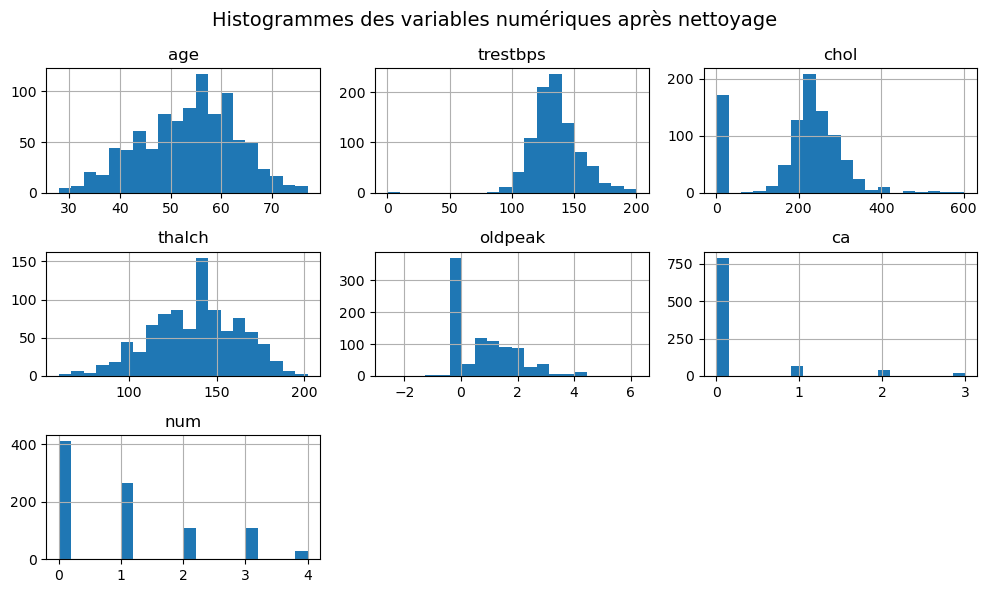

In [24]:
# 1. Histogrammes des variables numériques après nettoyage
df[variable_num].hist(figsize=(10, 6), bins=20)
plt.suptitle("Histogrammes des variables numériques après nettoyage", fontsize=14)
plt.tight_layout()
plt.show()

***<ul>***
    ***<p style="font-style:italic;font-size:20px;">- Interprétation :</p>***
***</ul>***

Les histogrammes permettent de visualiser la distribution des différentes variables numériques présentes dans le jeu de données après le processus de nettoyage.

- ***age :*** La distribution de l’âge suit une forme légèrement symétrique, centrée autour de 55-60 ans. Cela indique que la majorité des patients se situent dans cette tranche d’âge, ce qui est cohérent avec la population généralement à risque de maladies cardiaques.

- ***trestbps (pression artérielle au repos) :*** Cette variable est centrée autour de 130 mmHg avec une légère asymétrie vers la droite, montrant quelques cas de pression plus élevée. La distribution reste globalement concentrée.

- ***chol (cholestérol sérique) :*** La distribution est assez étalée avec quelques valeurs très élevées, indiquant la présence de patients avec un taux de cholestérol anormalement haut. Cela peut signaler des cas à surveiller.

- ***thalach (fréquence cardiaque maximale atteinte) :*** La distribution est relativement normale, avec un pic autour de 140 bpm. Cela suggère que la majorité des patients ont une capacité d’effort moyenne.

- ***oldpeak (dépression ST) :*** Cette variable est très asymétrique, avec un grand nombre de valeurs proches de 0 et quelques valeurs plus élevées. Cela peut indiquer que la majorité des patients présentent peu de dépression ST, tandis qu’un sous-groupe est plus à risque.

- ***ca (nombre de vaisseaux majeurs colorés) :*** La distribution est fortement déséquilibrée, avec une grande majorité de patients ayant ca = 0. Cela reflète un déséquilibre dans les données (déséquilibre de classes) qu’il faudra prendre en compte lors de la modélisation.

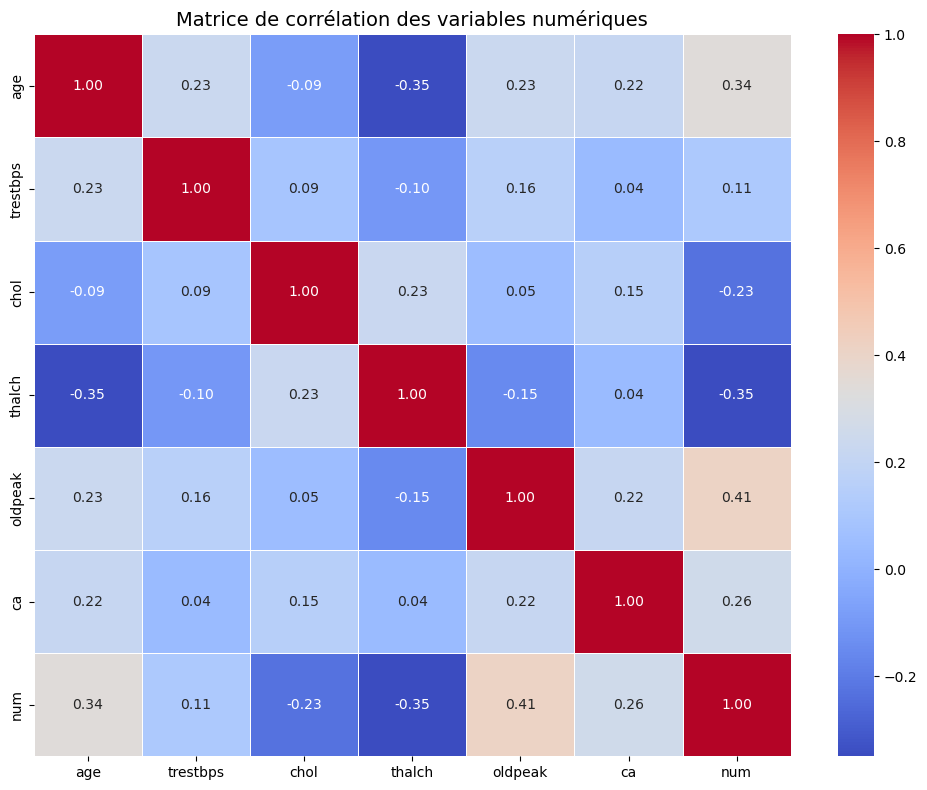

In [25]:
# Matrice de corrélation des variables numériques
corr = df[variable_num].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques", fontsize=14)
plt.tight_layout()
plt.show()

***<ul>***
    ***<p style="font-style:italic;font-size:20px;">Interprétation :</p>***
***</ul>***
- ***age ↔ thalach : -0.35*** → Corrélation négative modérée : plus l’âge augmente, plus la fréquence cardiaque maximale a tendance à diminuer. C’est physiologiquement logique.

- ***age ↔ trestbps, chol, oldpeak, ca : autour de +0.22 / +0.23*** → Légère corrélation positive : en vieillissant, il y a une petite tendance à avoir une pression artérielle, un taux de cholestérol ou un oldpeak plus élevé.

- ***thalach ↔ oldpeak : -0.15*** → Plus le patient atteint une fréquence cardiaque élevée à l’effort, plus le niveau de dépression ST est bas, ce qui est souvent le cas pour des cœurs en meilleur état.

La matrice de corrélation montre que ***les variables numériques présentent globalement de faibles corrélations entre elles***. Cela indique une diversité des informations contenues dans les données, ce qui est favorable à l'apprentissage d’un modèle performant. La seule corrélation modérée observée est celle entre ***l’âge et la fréquence cardiaque maximale atteinte***, ce qui est conforme aux connaissances médicales.

***<ul>***
    ***<p style="font-style:italic;font-size:20px;">Visualisation des variables catégoriques :</p>***
***</ul>***

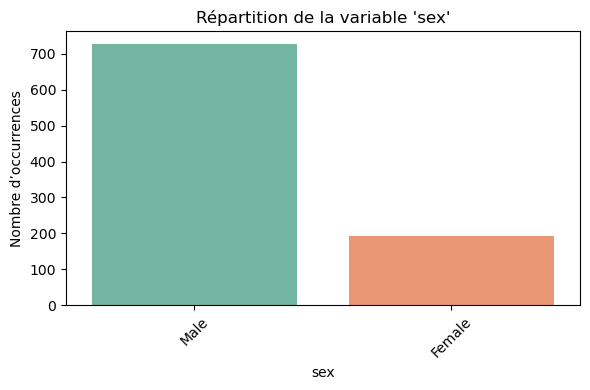

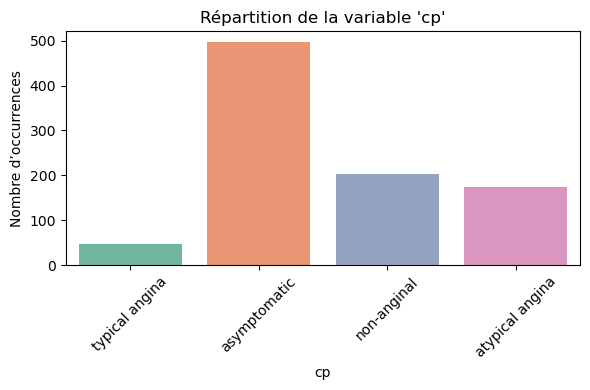

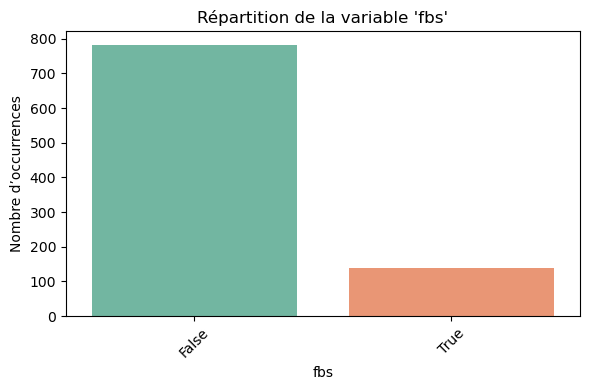

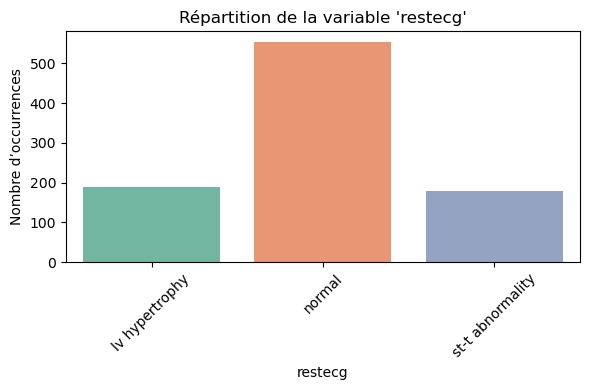

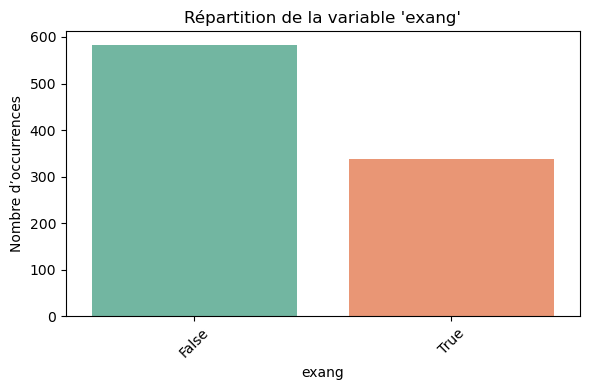

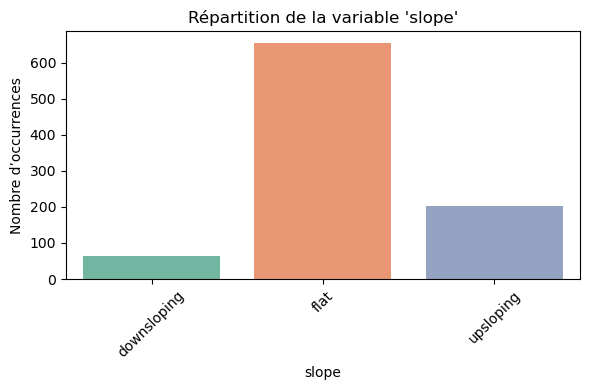

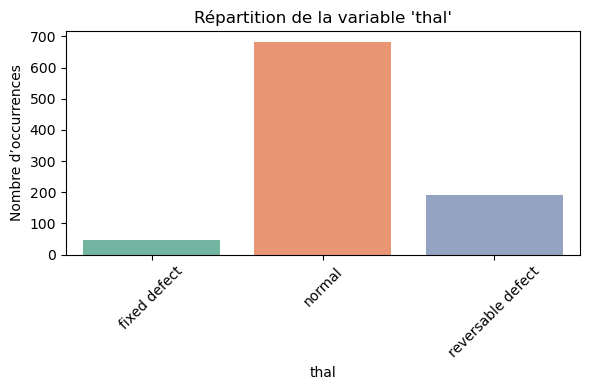

In [26]:
for col in variable_cat:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f"Répartition de la variable '{col}'")
    plt.xlabel(col)
    plt.ylabel("Nombre d’occurrences")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Transformation de la cible variable</p>***
***</ul>***

Dans ce jeu de données sur les maladies cardiaques, la variable cible ***num*** peut prendre plusieurs valeurs :*

***0*** *: Pas de maladie*

***1, 2, 3, 4*** *: Différents niveaux de gravité de la maladie*

*Ici, on transforme cette variable en binaire (0 ou 1) pour simplifier la tâche de classification binaire :*

***0*** → *Pas malade*

***1*** → *Malade*

In [27]:
# Transformation de la variable cible (num : 0 = aucune maladie, 1 = maladie présente)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
print("Aperçu du dataset après transformation :\n")
df

Aperçu du dataset après transformation :



,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
916,62,Male,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,1
918,58,Male,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,normal,0


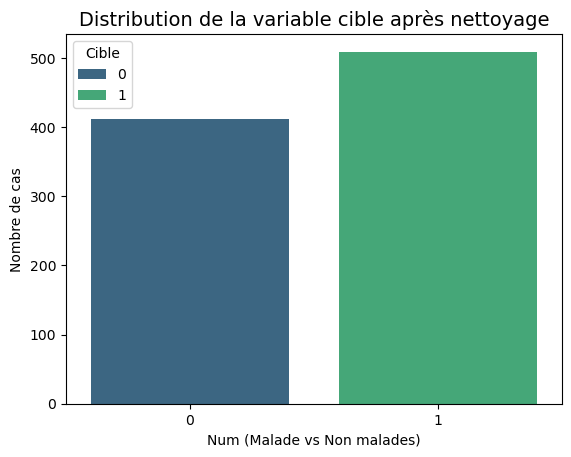

In [31]:
# Distribution de la variable cible
sns.countplot(x='num', data=df, hue='num', palette='viridis')
plt.title("Distribution de la variable cible après nettoyage", fontsize=14)
plt.xlabel("Num (Malade vs Non malades)")
plt.ylabel("Nombre de cas")
plt.legend(title='Cible')
plt.show()


***<p style="color:#90EE90; font-style:italic; font-size:35px; text-decoration:underline;">III. Traitement et Préparation pour le Modèle</p>***

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Séparation des variables explicatives et cibles</p>***
***</ul>***

*Ici, nous allons séparer les variables explicatives et les variables cibles. Dans notre cas, nous n'avons qu'une seule variable cible (num) qui permet de determiner si la personne est atteinte de maladie cardiaque ou pas.*

In [32]:
## Séparation des variables explicatives et cibles
X = df.drop("num", axis=1)
y = df["num"]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Encodage des variables catégoriques</p>***
***</ul>***

In [33]:
#Encodage des variables categoriques
variable_cat = ['sex', 'cp', 'restecg', 'thal', 'slope', 'exang', 'fbs']
variable_num = [col for col in X.columns if col not in variable_cat]
print("Valeur catégorique :", variable_cat)
print("\nValeur numeriques :", variable_num)

Valeur catégorique : ['sex', 'cp', 'restecg', 'thal', 'slope', 'exang', 'fbs']

Valeur numeriques : ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']


***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Standardisation des variables numériques</p>***
***</ul>***

In [34]:
## Standardisation des variables numériques
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), variable_num),
    ('cat', OneHotEncoder(), variable_cat)
])
print(preprocessor)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'trestbps', 'chol', 'thalch',
                                  'oldpeak', 'ca']),
                                ('cat', OneHotEncoder(),
                                 ['sex', 'cp', 'restecg', 'thal', 'slope',
                                  'exang', 'fbs'])])


***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Division en ensemble d'entraînement (train) et de test</p>***
***</ul>*** 

In [35]:
#Division en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set : ", X_train.shape)
print("Test set : ", X_test.shape)

Train set :  (736, 13)
Test set :  (184, 13)


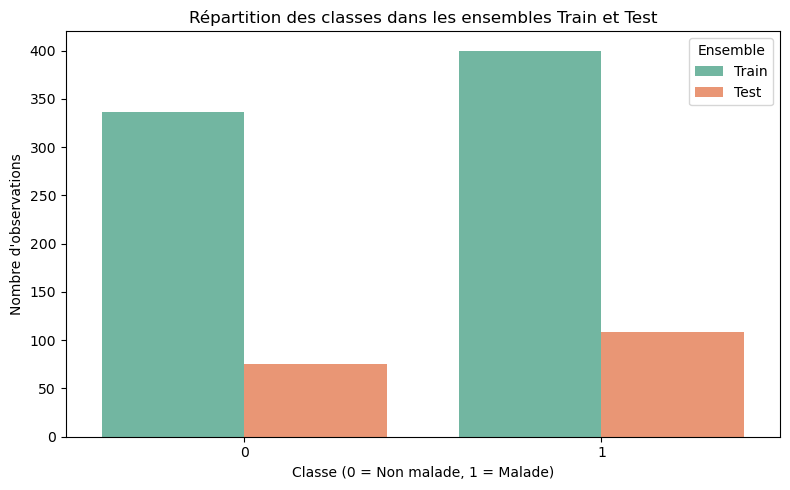

In [36]:
# Création d'un DataFrame combiné pour visualiser la répartition des classes
train_labels = pd.DataFrame({'Classe': y_train, 'Ensemble': 'Train'})
test_labels = pd.DataFrame({'Classe': y_test, 'Ensemble': 'Test'})
labels_combined = pd.concat([train_labels, test_labels])

# Tracé du graphique
plt.figure(figsize=(8, 5))
sns.countplot(data=labels_combined, x='Classe', hue='Ensemble', palette='Set2')
plt.title("Répartition des classes dans les ensembles Train et Test")
plt.xlabel("Classe (0 = Non malade, 1 = Malade)")
plt.ylabel("Nombre d'observations")
plt.legend(title="Ensemble")
plt.tight_layout()
plt.show()

***<p style="color:#90EE90; font-style:italic; font-size:35px; text-decoration:underline;">IV. Construction et Entraînement du Modèle</p>***
***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Entrainement sur plusieurs modèles</p>***
***</ul>***

*Nous allons tester plusieurs modèles de classification et afficher leur score de précision pour voir leur performance sur notre jeu de données.*

In [37]:
# Liste des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
}

# Entrainement et évaluation des modèles sur train **et test**
results_train = {}
results_test = {}

for nom, modele in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', modele)
    ])
    
    pipeline.fit(X_train, y_train)
    
    # Prédictions sur X_train
    y_pred_train = pipeline.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    # Prédictions sur X_test
    y_pred_test = pipeline.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    
    results_train[nom] = acc_train
    results_test[nom] = acc_test
    
    print(f" ## {nom}")
    print(f"   - Accuracy TRAIN: {acc_train:.4f}")
    print(f"   - Accuracy TEST : {acc_test:.4f}")
    print(f"   - Classification report TEST :\n{classification_report(y_test, y_pred_test)}")
    print("-" * 60)

 ## Logistic Regression
   - Accuracy TRAIN: 0.8329
   - Accuracy TEST : 0.7989
   - Classification report TEST :
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        75
           1       0.85      0.80      0.82       109

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.80      0.80       184

------------------------------------------------------------
 ## Random Forest
   - Accuracy TRAIN: 1.0000
   - Accuracy TEST : 0.8315
   - Classification report TEST :
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        75
           1       0.90      0.81      0.85       109

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184

------------------------------------------------------------
 #

<Figure size 1000x600 with 0 Axes>

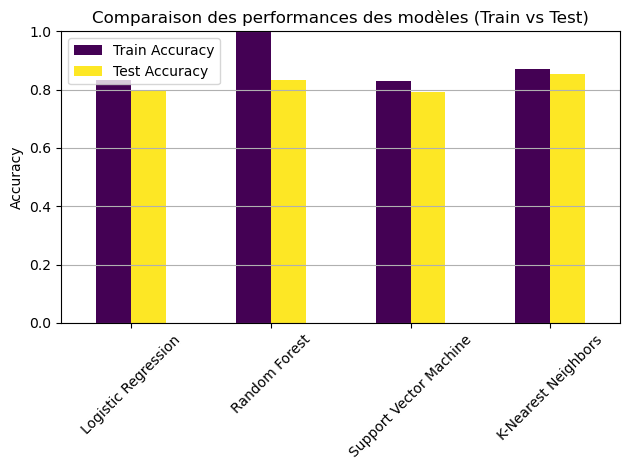

In [38]:
# Transformation des résultats en DataFrame
df_results = pd.DataFrame({
    'Train Accuracy': results_train,
    'Test Accuracy': results_test
})

# Création d’un graphique en barres
plt.figure(figsize=(10, 6))
df_results.plot(kind='bar', colormap='viridis')
plt.title('Comparaison des performances des modèles (Train vs Test)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Interpretation et Choix du modèle</p>***
***</ul>***   

- K-Nearest Neighbors (KNN) :
    - Test accuracy la plus élevée (0.85), donc il généralise très bien.

    - F1-score classe 1 = 0.87. donc Il détecte très bien les malades.

    - Train accuracy raisonnable (0.87) donc Pas de sur-apprentissage (overfitting).

- Random Forest :
    - Train accuracy = 1.00, donc il a trop bien appris le training set (overfitting).

    - Bien sur test aussi (0.83), mais peut être moins fiable sur de nouvelles données.

- Logistic Regression et SVM :
    - Solides, mais un peu en dessous en précision et f1-score.

*Après avoir comparé plusieurs algorithmes de classification (Régression logistique, Random Forest, SVM et K-Nearest Neighbors), le modèle ***K-Nearest Neighbors (KNN)*** a été retenu comme modèle final en raison de ses performances globales supérieures. Il a affiché la meilleure précision sur les données de test ***(85,33 %)*** ainsi qu’un bon équilibre entre précision, rappel et f1-score pour les deux classes, tout en évitant le sur-apprentissage observé avec d’autres modèles comme la Random Forest. Ces résultats suggèrent que KNN est le modèle le plus adapté à notre jeu de données.*

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Cross validation</p>***
***</ul>***   

*Pour obtenir une évaluation plus fiable et éviter que les résultats ne soient influencés par un découpage arbitraire des données, une validation croisée a été utilisée. Cela permet de tester chaque modèle sur différentes parties des données et d’obtenir une estimation plus précise de sa performance.*

In [39]:
#CROSS VALIDATION
from sklearn.model_selection import cross_val_score
# Fusionner les ensembles pour faire une validation croisée globale
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

# Résultats de la validation croisée
cv_results = {}

print("\n- VALIDATION CROISÉE (5-fold):")
for nom, modele in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', modele)
    ])
    
    scores = cross_val_score(pipeline, X_full, y_full, cv=5, scoring='accuracy')
    cv_results[nom] = scores
    
    print(f"{nom}")
    print(f"Moyenne des scores : {scores.mean():.4f}")
    print(f"  Écart-type         : {scores.std():.4f}")
    print("-" * 50)

#Affichage du meilleur modèle
best_model = max(cv_results.items(), key=lambda x: x[1].mean())
print(f"\nMeilleur modèle : {best_model[0]} avec une moyenne de {best_model[1].mean():.4f}")


- VALIDATION CROISÉE (5-fold):
Logistic Regression
Moyenne des scores : 0.8152
  Écart-type         : 0.0309
--------------------------------------------------
Random Forest
Moyenne des scores : 0.8152
  Écart-type         : 0.0215
--------------------------------------------------
Support Vector Machine
Moyenne des scores : 0.8109
  Écart-type         : 0.0246
--------------------------------------------------
K-Nearest Neighbors
Moyenne des scores : 0.8174
  Écart-type         : 0.0224
--------------------------------------------------

Meilleur modèle : K-Nearest Neighbors avec une moyenne de 0.8174


- ***K-Nearest Neighbors (KNN)*** obtient la meilleure *moyenne de score : 0.8174*, ce qui signifie qu’il généralise légèrement mieux que les autres modèles sur des sous-ensembles différents des données. *écart-type : 0.0224*, ce qui indique que ses performances sont stables d’un pli à l’autre (peu de variations).

- ***Logistic Regression et Random Forest*** ont exactement *la même moyenne : 0.8152*, mais :

    ***Random Forest*** a un *écart-type plus faible (0.0215)* → donc plus stable que la régression logistique (*écart-type : 0.0309*).

- ***Support Vector Machine (SVM)*** a la *plus faible moyenne (0.8109)*, ce qui en fait le moins performant ici, même si la différence est faible.

Tous les modèles sont assez proches en performance, mais ***KNN est légèrement supérieur en moyenne et stable***, ce qui justifie son choix comme modèle final

***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Prédictions</p>***
***</ul>***

In [40]:
import joblib

final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', models[best_model[0]])  # Utilisation automatique du meilleur modèle
])

# Entraînement sur l’ensemble complet (X_full, y_full)
final_pipeline.fit(X_full, y_full)

# Sauvegarde du modèle
joblib.dump(final_pipeline, 'meilleur_modele.pkl')
print("\nModèle sauvegardé sous le nom : meilleur_modele.pkl")

# Exemple de prédiction sur X_test
y_pred = final_pipeline.predict(X_test)

# Affichage des résultats
print("\nPrédictions :", y_pred)


Modèle sauvegardé sous le nom : meilleur_modele.pkl

Prédictions : [0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0
 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1
 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1]


In [41]:
# Évaluation du modèle sur les données de test
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nÉvaluation sur les données de test :")
print("Précision du modèle :", accuracy)
print("\nRapport de classification :\n", report)


Évaluation sur les données de test :
Précision du modèle : 0.8913043478260869

Rapport de classification :
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        75
           1       0.90      0.92      0.91       109

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184




***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Visualisation des Résultats des Prédictions</p>***
***</ul>***

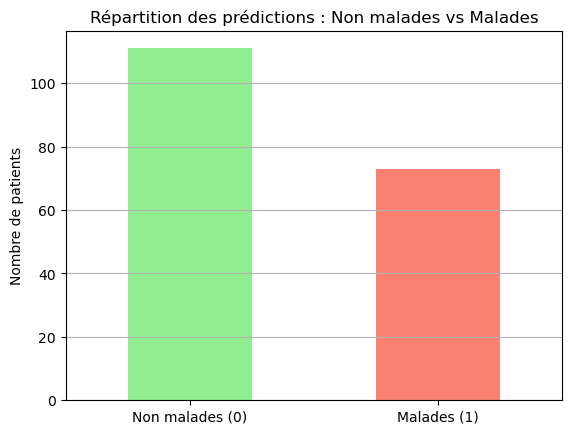

In [42]:
# Affichage de la répartition des prédictions
y_pred_series = pd.Series(y_pred) # Transformer y_pred en Series pour compter
y_pred_series.value_counts().plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title("Répartition des prédictions : Non malades vs Malades")
plt.xticks(ticks=[0, 1], labels=["Non malades (0)", "Malades (1)"], rotation=0)
plt.ylabel("Nombre de patients")
plt.grid(axis='y')
plt.show()

Ce graphe présente la répartition des prédictions du modèle en deux classes : les malades (1) et les non malades (0).
Le modèle prédit que la majorité des patients ne sont pas malades.
Il y a donc moins de patients malades que de non malades dans ce jeu de données.


***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Exemple de prédiction avec des profils differents</p>***
***</ul>***

In [86]:
# Chargement du modèle une seule fois
modele_final = joblib.load('meilleur_modele.pkl')

def predire_patient(profil_patient: dict):
    """
    Prédit le risque de maladie cardiaque pour un patient donné.

    :param profil_patient: Dictionnaire contenant les attributs du patient
    :return: Tuple (diagnostic, probabilité)
    """
    # Création d’un DataFrame avec une seule ligne
    df_patient = pd.DataFrame([profil_patient])

    # Prédiction
    prediction = modele_final.predict(df_patient)[0]
    proba = modele_final.predict_proba(df_patient)[0][prediction]

    diagnostic = "NON malade (0)" if prediction == 0 else " MALADE (1)"
    return diagnostic, round(proba * 100, 2)

# Exemple d’un nouveau patient
profil1 = {
    'age': 54,
    'sex': 'Male',
    'cp': 'asymptomatic',
    'trestbps': 130.0,
    'chol': 250.0,
    'fbs': False,
    'restecg': 'normal',
    'thalch': 150.0,
    'exang': False,
    'oldpeak': 1.0,
    'slope': 'flat',
    'ca': 0.0,
    'thal': 'normal'
}

# Utilisation de la fonction
diagnostic, proba = predire_patient(profil1)
print(f"- Résultat du premier profil: {diagnostic} avec une probabilité de {proba}%")

profil2 = {
    'age': 50,
    'sex': 'Male',
    'cp': 'asymptomatic',
    'trestbps': 130.0,
    'chol': 250.0,
    'fbs': True,
    'restecg': 'normal',
    'thalch': 150.0,
    'exang': True,
    'oldpeak': 1.0,
    'slope': 'flat',
    'ca': 0.0,
    'thal': 'normal'
}

# Utilisation de la fonction
diagnostic, proba = predire_patient(profil2)
print(f"- Résultat du second profil: {diagnostic} avec une probabilité de {proba}%")

- Résultat du premier profil: NON malade (0) avec une probabilité de 60.0%
- Résultat du second profil:  MALADE (1) avec une probabilité de 80.0%


***<p style="color:#90EE90; font-style:italic; font-size:35px; text-decoration:underline;">VI. Conclusion</p>***


Dans le cadre de notre projet, nous avons mené une étude complète sur un jeu de données médicales dans le but de prédire la probabilité qu’une personne soit atteinte d’une maladie cardiaque. Cette analyse a suivi les principales étapes d’un pipeline de data science, incluant le nettoyage des données, leur visualisation, la préparation du jeu pour l’apprentissage automatique, l’entraînement de plusieurs modèles de classification, ainsi que l’évaluation de leurs performances.

Parmi les algorithmes testés – à savoir ***la Régression Logistique, le Random Forest, la Machine à Vecteurs de Support (SVM) et le K-Nearest Neighbors (KNN)*** – le ***modèle KNN*** s’est distingué comme étant le plus performant, en affichant une bonne précision aussi bien sur les données d'entraînement que sur celles de test.


***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Forces du modèle sélectionné</p>***
***</ul>***

- Le modèle KNN s’est avéré simple à implémenter tout en étant efficace sur ce type de données.

- Il a permis de conserver un bon équilibre entre l’apprentissage et la généralisation, avec peu de signes de surapprentissage.

- L’intégration dans un pipeline a facilité la standardisation des données et l’automatisation des prédictions futures.

- Les visualisations graphiques ont permis de mieux comprendre la distribution des classes et des variables catégoriques.


***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Limites identifiées</p>***
***</ul>***

- Le modèle KNN reste sensible à la mise à l’échelle des données, ce qui peut influer sur ses performances si cette étape est négligée.

- Il ne fournit pas d’indication directe sur l’importance des variables, ce qui limite l’interprétabilité du modèle.

- Sa performance peut se dégrader en présence d’un jeu de données de grande taille, du fait de la recherche des voisins les plus proches.

- Un éventuel déséquilibre entre les classes peut fausser les performances si des métriques adaptées ne sont pas utilisées.


***<ul>***
    ***<p style="font-style:italic;font-size:25px; text-decoration:underline;">- Perspectives d’amélioration</p>***
***</ul>***

Afin d’améliorer davantage la robustesse et l’efficacité du modèle, plusieurs pistes peuvent être envisagées :

- L’exploration d’algorithmes plus puissants comme XGBoost ou LightGBM.

- La mise en place d’une optimisation d’hyperparamètres à l’aide de méthodes comme GridSearchCV.

- Une réduction de la dimensionnalité par sélection de variables ou techniques de projection.

- Une évaluation plus fine grâce à des outils comme la courbe ROC, l’aire sous la courbe (AUC) ou la matrice de confusion.

- Enfin, le déploiement du modèle dans une application ou une interface simple pour une utilisation pratique.